# Code Mapping Exercise

---

<br>

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>
 
---

In [ ]:
#@title
# Import libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
import pandas as pd
import numpy as np

Below is functioning code for our Queue Theory example.  Working with a partner, "map" the process of this code using the "boxes and arrows" approach that we practiced in class.  This process should be helpful to you as you consider the Casino Royale challenge task, too!

In [ ]:
# Define new run_simulation and mult_runs
def mult_runs(lam,mu,num_sims,num_steps,change_func):
    mean = pd.Series([],dtype = object)
    for i in range(num_sims):
        line = pd.Series(dict(cust=0,cust2=0),name='Customers in line')
        global_results = run_simulation(line, lam,mu,num_steps, change_func)
        metrics = compute_metrics(global_results,lam)
        mean[i] = metrics[0]
    return mean

def run_simulation(state,lam,mu,num_steps,change_func):
    """Simulate a queueing system.
    """

    results = pd.Series([],dtype=object)
    results[0] = state.sum()
    
    for t in range(num_steps):
        state = change_func(state,lam,mu)
        results[t+1] = state.sum()
        
    results.plot(label='customers in line',color='C3',
             title='Customers in line',xlabel='time',
             ylabel='Number of customers');
    return results

def compute_metrics(results, lam):
    L = results.mean()
    M = results.max()
    W = L / lam
    #print("The average number of customers in line is",f'{L:.3}', "customers.")
    #print("The maximum number of customers in line is", M, "customers.")
    #print("The average time spent by customers in line is", f'{W:.3}', "minutes.")

    return L, M, W

In [ ]:
# Two queues and two servers
def change_func_2q_2s(state,lam,mu):
 
    if state.cust > 0:
        if flip(mu):
            state.cust -= 1
    if state.cust2 > 0:
        if flip(mu):
            state.cust2 -= 1
            
    # The following assumes that the arriving customer will 
    # join the shortest line
    if flip(lam):
        if state.cust > state.cust2:
            state.cust2 += 1
        else:
            state.cust += 1

    
    return state

0.7765289256198347

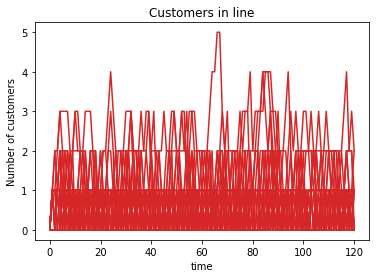

In [ ]:
lam = 0.5
mu = 0.5
num_sims = 25
num_steps = 120
mean = mult_runs(lam, mu, num_sims, num_steps, change_func_1q_2s)
mean.mean()